In [ ]:
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

In [ ]:
#The Countries_WGS84 shapefile goes in here
from google.colab import files
uploaded = files.upload()

In [30]:
#Evan Collins
#IDCE 30274
#Functions to geoparse, map and graph frequency 

#Geoparse function takes a URL and parses out cities.
#Returns a list of cities, and a geo dataframe of the cities
def geoparse(inputURL):  #Get Locations
  response = request.urlopen(inputURL)
  raw = response.read().decode('utf8')
  places = GeoText(raw)
  cities = list(places.cities)
  geolocator = Nominatim(user_agent='skievanc@gmail.com', timeout=2) 
  lat_lon = []
  for city in cities:
    try:
      location = geolocator.geocode(city)
      if location:
        lat_lon.append(location)
    except GeocoderTimedOut as e:
      print("Error: geocode failed on input %s with message %s">
            (city, e))
  df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
  geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
  crs = {'init': 'epsg:4326'}
  # convert df to geo df
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
  return cities, geo_df

#Assign variables to the function results
cities, geo_df=geoparse('https://www.gutenberg.org/files/65436/65436-0.txt') #The book being geoparsed




/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


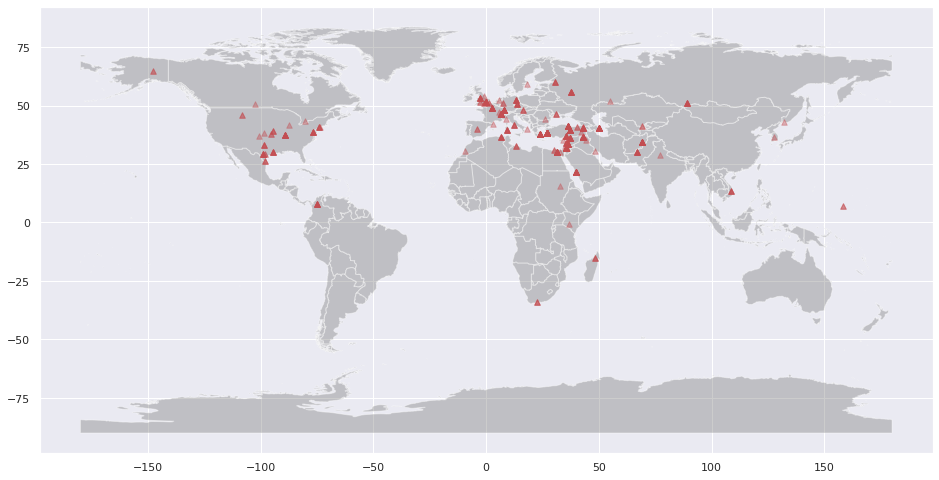

In [31]:
#Graphs the cities from the geo dataframe
def graph(geo_df):  #Graph
  countries_map = gpd.read_file('Countries_WGS84.shp')
  f, ax = plt.subplots(figsize=(16, 16))
  countries_map.plot(ax=ax, alpha=0.4, color='grey')
  geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

graph(geo_df)

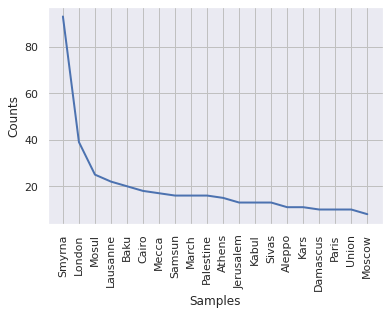

In [32]:
#Graphs the freq of each city occuring
def freq(cities):  #Freq Dist
  %matplotlib inline
  sns.set()  
  freqdist1 = nltk.FreqDist(cities)
  freqdist1.plot(20)
freq(cities)